<a href="https://colab.research.google.com/github/zrbeaty/zorabio108tutorial/blob/main/Copy_of_Zora_Beaty_HW_Wk10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 7 Tutorial

Given the recent wildfires in California, I am interested in investigating how features of hazard areas vary from year to year. The main objective of this tutorial is to explore the spatial distribution of high hazardous wild fire areas in California. Using GIS data, we will determine how spatial features differ between designated areas per year to answer the following question, "How do spatial attributes (shape len and shape area) of each designated year differ?"

In [ ]:
### Install packages
! pip install -U leafmap
! pip install folium matplotlib mapclassify

In [ ]:
### Import packages
import requests #for automated queries from sources online
import zipfile
import io #for operating system
import os  #for operating system
from pathlib import Path  #for operating system
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import leafmap
from shapely.geometry import shape

###California High Hazard Areas

Let's explore GIS data provided by the California Natural Resources Agency (CNRA) to determine the features of high hazard wildlife areas in California!

In [ ]:
# Access data
cali_high_hazard = requests.get("https://gis.data.cnra.ca.gov/api/download/v1/items/a71a85136b0b414ea734fdfbe3d7674a/geojson?layers=0")

In [ ]:
#API query response, know if accessing data was successful or not
cali_high_hazard.json()['crs']

In [ ]:
### List to store processed data
data_list = []
geometries = []

### Extract and process each feature
for feature in cali_high_hazard.json()['features']:
    # Extract properties
    props = feature['properties'] #dictionaries nested into dictionaries (think of Russian nesting dolls)
    # Extract and convert geometry
    geom = shape(feature['geometry'])
    # Add properties to data list
    data_list.append(props)
    # Add geometry to geometries list
    geometries.append(geom)

In [ ]:
### View first rows of Pandas Data Frame
cali_df = pd.DataFrame(data_list)

cali_df

In [ ]:
# Inspect data
cali_df.info()

In [ ]:
### Create the GeoDataFrame using the pandas DF as a starting point
cali_spatial = gpd.GeoDataFrame(
    cali_df,
    geometry=geometries, #adding on geometries list
    crs="EPSG:4326"  # WGS84 coordinate system
)

####Visualizations of High Hazard Areas

Let's map the high hazard areas in California by determining the geometries of each area!

In [ ]:
#Visualize data
cali_spatial.loc[:6000].explore()

In [ ]:
# View data set with newly added geometry column
cali_spatial

In [ ]:
# View geometry data for 2018
cali_spatial.loc[cali_spatial["YEARDESIGNATED"] == "2018", "geometry"]

In [ ]:
#Dissolve the spatial data by year
cali_spatial.dissolve(by = "YEARDESIGNATED")

In [ ]:
#Received a GEOSExpection message, resolving issue by identifying invalid input geometries
invalid_geometries = cali_spatial[~cali_spatial.is_valid]
print(invalid_geometries)

In [ ]:
#Repairing any invalid geometries
from shapely.validation import make_valid
cali_spatial['geometry'] = cali_spatial['geometry'].apply(lambda geom: make_valid(geom) if not geom.is_valid else geom)

In [ ]:
#Rerun the dissolve function given geometries are valid (corrected)
cali_spatial.dissolve(by = "YEARDESIGNATED")

In [ ]:
#Group data by year, and plot shape area for each year
cali_spatial.dissolve(by = "YEARDESIGNATED", aggfunc="sum").plot(column = "SHAPEAREA")

In [ ]:
#Group data by year, and plot shape len for each year
cali_spatial.dissolve(by = "YEARDESIGNATED", aggfunc="sum").plot(column = "SHAPELEN")

<Axes: >

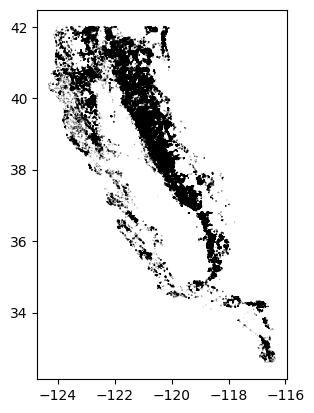

In [ ]:
#Plot the new spatial data (aggregated by year)
cali_spatial.plot(edgecolor = "k")

####Let's Take A Closer Look

For my new visualizations, we will continue to use geometric data to visualize high hazard areas in California. For our first visualization, we will plot the first object of our Geopandas dataframe using the .explore function. For the second visualization, we will plot the geometries of the first 500 objects of our Geopandas dataframe using the .explore function with the yeardesignated property.

In [ ]:
#Read in Geopandas dataframe and view the first five rows!
cali_high_hazard_url = "https://gis.data.cnra.ca.gov/api/download/v1/items/a71a85136b0b414ea734fdfbe3d7674a/geojson?layers=0"
calidf = gpd.read_file(cali_high_hazard_url)
calidf.head()

In [ ]:
#Visualize the first object to see a zoomed in version of the hazard area
calidf.iloc[[0]].explore(color='red', marker_kwds={'radius':20})

In [ ]:
#Visualize the first 500 high hazard areas with the following property in the label: year designated
calidf[['YEARDESIGNATED', 'geometry']].iloc[:500].explore(color='red', marker_kwds={'radius':20})